 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [122]:
# Reading whale returns

    
whale_returns_path = Path('Resources/whale_returns.csv')
whale_returns_data = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True)
whale_returns_data.sample(5)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
988,2019-01-17,0.003667,0.007093,0.006109,0.005210
900,2018-09-11,0.001953,-0.004287,0.007189,0.006222
168,2015-10-26,0.005491,0.003900,0.004319,0.004007
212,2015-12-28,-0.004883,-0.006347,-0.005518,-0.010759
702,2017-11-27,-0.009715,-0.003499,-0.002032,-0.009372


In [50]:
# Count nulls

whale_returns_data.isnull()

whale_returns_data.isnull().mean() * 100
whale_returns_data.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [16]:
#determine the number of nulls

whale_returns_data.isnull().sum()

# Drop nulls
whale_returns_data = whale_returns_data.dropna


In [17]:
# Reading algorithmic returns
algo_returns_path = Path('Resources/algo_returns.csv')
algo_returns_data = pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True)
algo_returns_data.sample(5)


,Date,Algo 1,Algo 2
1113,2018-10-25,0.012554,0.014107
769,2017-06-15,-0.005685,-0.002739
1097,2018-10-03,-0.000526,0.006670
626,2016-11-17,0.000908,0.002963
637,2016-12-05,-0.001863,0.015114


In [18]:
# Count nulls

algo_returns_data.isnull()

algo_returns_data.isnull().mean() * 100

Date      0.000000
Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [158]:

# Drop nulls

algo_returns_data = algo_returns_data.dropna()
algo_returns_data.rename(columns={'Close': 'sp500_Close'}, inplace=True)

algo_returns_data.head()
#algo_returns_data.dtypes

#algo_returns_daily = algo_returns_data.pct_change()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [22]:
# Reading S&P 500 Closing Prices
    #pd.DataFrame()
    
sp500_history_path = Path('Resources/sp500_history.csv')
sp500_history_data = pd.read_csv(sp500_history_path, parse_dates=True, infer_datetime_format=True)
sp500_history_data.sample(5)

,Date,Close
469,9-Jun-17,$2431.77
1015,10-Apr-15,$2102.06
879,22-Oct-15,$2052.51
1599,12-Dec-12,$1428.48
1129,24-Oct-14,$1964.58


In [23]:
# Check Data Types
sp500_history_data.dtypes

Date     object
Close    object
dtype: object

In [24]:
# Fix Data Types
sp500_history_data.set_index('Date')
sp500_history_data.head()
sp500_history_data.dtypes
#sp500_history_data["Close"] = sp500_history_data.to_numeric(sp_500_history_data["Close"])



Date     object
Close    object
dtype: object

In [39]:
# Calculate Daily Returns

#sp500_history_returns = sp500_history_data.pct_change().dropna()

#sp_500_history_returns.head()

In [40]:
# Drop nulls
sp500_history_data = sp500_history_data.dropna()

In [41]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_data.rename(columns={'Close': 'sp500_Close'}, inplace=True)
sp500_history_data.head()

,Date,sp500_Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [44]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

all_portfolios_returns = pd.concat([whale_returns_data, algo_returns_data], axis='columns', join='inner')

#all_portfolios_returns = pd.concat([whale_returns_data, algo_returns_data, sp500_history_data], axis='columns', join='outer')

#all_portfolios_returns.head()

TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

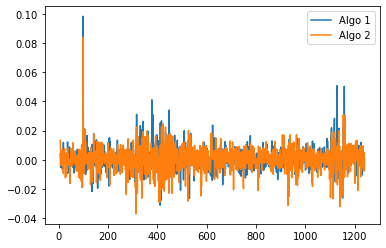

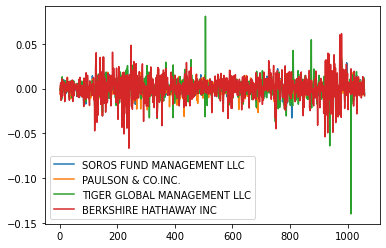

In [51]:
# Plot daily returns of all portfolios
#all_portfolio_returns.plot()

algo_returns_data.plot()

whale_returns_data.plot()



#### Calculate and Plot cumulative returns.

In [64]:
# Calculate cumulative returns of all portfolios



#cumulative_returns = (1+whale_returns_data).cumprod()-1
#cumulative_returns.head()


# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

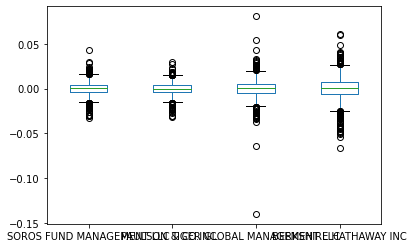

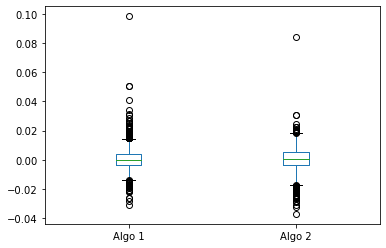

In [59]:
# Box plot to visually show risk

whale_returns_data.plot.box()
algo_returns_data.plot.box()

#sp500_returns_data.plot.box()



### Calculate Standard Deviations

In [76]:
# Calculate the daily standard deviations of all portfolios

algo_returns_std = algo_returns_data.std()

whale_returns_std = whale_returns_data.std() 

whale_returns_data.mean()







### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:ylabel='Frequency'>

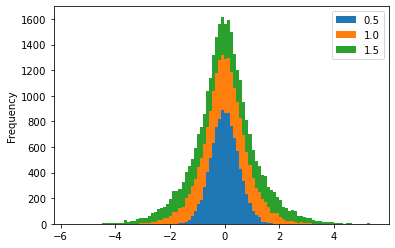

In [103]:
# Calculate  the daily standard deviation of S&P 500

#sp500_returns_std_annual = sp500_returns_data.std() * np.sqrt(1649)


# Determine which portfolios are riskier than the S&P 500 

#this is wrong



portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std})

portfolio_std.plot.hist(stacked=True, bins=100)

### Calculate the Annualized Standard Deviation

In [80]:
# Calculate the annualized standard deviation (252 trading days)


algo_returns_std_annuallized = algo_returns_data.std() * np.sqrt(252)

whale_returns_std_annual_annualized = whale_returns_data.std() * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:>

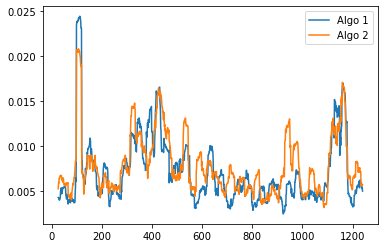

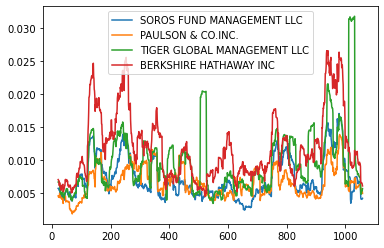

In [86]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

algo_returns_rolling_std = algo_returns_data.rolling(21).std()

whale_returns_rolling_std = whale_returns_data.rolling(21).std()

# Plot the rolling standard deviation

algo_returns_rolling_std.plot()
whale_returns_rolling_std.plot()

### Calculate and plot the correlation

In [106]:
# Calculate the correlation


corr_algo = algo_returns_data.corr()

# Display de correlation matrix

print(corr_algo)


          Algo 1    Algo 2
Algo 1  1.000000  0.346568
Algo 2  0.346568  1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [112]:
# Calculate covariance of a single portfolio

covar_algo_returns = algo_returns_data.cov()
covar_whale_returns = whale_returns_data.cov()

print(covar_algo_returns)
print(covar_whale_returns)

# Calculate variance of S&P 500  

variance_algo_returns_data = algo_returns_data.std() 
print(variance_algo_returns_data)

# Computing beta


# Plot beta trend
#not sure how to do this

          Algo 1    Algo 2
Algo 1  0.000064  0.000023
Algo 2  0.000023  0.000072
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     0.000061            0.000038   
PAULSON & CO.INC.                             0.000038            0.000049   
TIGER GLOBAL MANAGEMENT LLC                   0.000048            0.000033   
BERKSHIRE HATHAWAY INC                        0.000076            0.000049   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.000048   
PAULSON & CO.INC.                               0.000033   
TIGER GLOBAL MANAGEMENT LLC                     0.000117   
BERKSHIRE HATHAWAY INC                          0.000059   

                             BERKSHIRE HATHAWAY INC  
SOROS FUND MANAGEMENT LLC                  0.000076  
PAULSON & CO.INC.                          0.000049  
TIGER GLOBAL MANAGEMENT LLC                0.000059  
BERKSHIRE H

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [121]:
# Use `ewm` to calculate the rolling window
#whale_returns_ewm = whale_returns_data.ewm(self=1, com=None, span=None, halflife=None, alpha=None, min_periods=21, adjust=True, ignore_na=False,axis=0)

whale_returns_ewm = whale_returns_data.ewm(com=0.5).mean()
whale_returns_ewm.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,NaN,NaN,NaN,NaN
1,-0.001266,-0.004981,-0.000496,-0.006569
2,0.001356,0.001186,-0.002024,0.001518
3,0.003198,0.003187,0.001007,0.005124
4,-0.004297,-0.001377,-0.005397,-0.007176


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

Algo 1    0.081903
Algo 2    0.040269
dtype: float64
SOROS FUND MANAGEMENT LLC      0.022777
PAULSON & CO.INC.             -0.029112
TIGER GLOBAL MANAGEMENT LLC   -0.007450
BERKSHIRE HATHAWAY INC         0.039033
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ration big Whale'}>

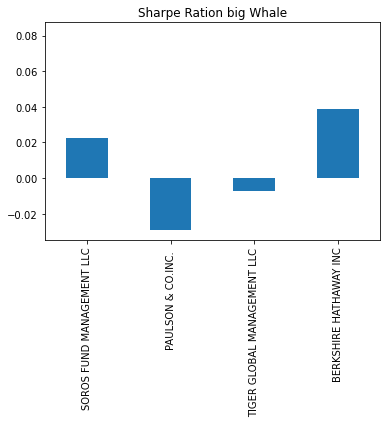

In [105]:
# Annualized Sharpe Ratios

sharpe_ratio_whale_returns = (whale_returns_data.mean()/ (whale_returns_std))


sharpe_ratio_algo_returns = (algo_returns_data.mean()/ (algo_returns_std))

print(sharpe_ratio_algo_returns)

print(sharpe_ratio_whale_returns)

sharpe_ratio_algo_returns.plot.bar(title='Sharpe Ratios for Algo')

sharpe_ratio_whale_returns.plot.bar(title='Sharpe Ration big Whale')


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [175]:
# Reading data from 1st stock

    
aapl_historical_path = Path('Resources/aapl_historical.csv')
aapl_historical_data = pd.read_csv(aapl_historical_path, parse_dates=True, infer_datetime_format=True)

aapl_historical_data = aapl_historical_data.set_index('Trade DATE')

aapl_historical_data = aapl_historical_data.drop(['Symbol'], axis=1)

aapl_historical_data.rename(columns={'NOCP': 'AAPL'}, inplace=True)


aapl_historical_data.sample(5)



,AAPL
Trade DATE,
6/26/2018,184.43
7/26/2018,194.21
5/25/2018,188.58
1/7/2019,147.93
7/31/2018,190.29


In [176]:
# Reading data from 2nd stock
    
cost_historical_path = Path('Resources/cost_historical.csv')
cost_historical_data = pd.read_csv(cost_historical_path, parse_dates=True, infer_datetime_format=True)

cost_historical_data = cost_historical_data.set_index('Trade DATE')

cost_historical_data = cost_historical_data.drop(['Symbol'], axis=1)

cost_historical_data.rename(columns={'NOCP': 'COST'}, inplace=True)

cost_historical_data.sample(5)

,COST
Trade DATE,
3/28/2019,241.22
7/26/2018,221.72
8/14/2018,222.00
7/11/2018,210.95
5/8/2019,241.34


In [177]:
# Reading data from 3rd stock

goog_historical_path = Path('Resources/goog_historical.csv')
goog_historical_data = pd.read_csv(goog_historical_path, parse_dates=True, infer_datetime_format=True)


goog_historical_data = goog_historical_data.set_index('Trade DATE')

goog_historical_data = goog_historical_data.drop(['Symbol'], axis=1)

goog_historical_data.rename(columns={'NOCP': 'GOOG'}, inplace=True)



goog_historical_data.sample(5)

,GOOG
Trade DATE,
5/24/2018,1079.24
7/10/2018,1152.84
4/2/2019,1200.49
9/14/2018,1172.53
7/5/2018,1124.27


In [178]:
# Combine all stocks in a single DataFrame


all_stocks_data = pd.concat([aapl_historical_data, cost_historical_data, goog_historical_data], axis='columns', join='inner')

all_stocks_data.head()

,AAPL,COST,GOOG
Trade DATE,,,
5/9/2019,200.72,243.47,1162.38
5/8/2019,202.90,241.34,1166.27
5/7/2019,202.86,240.18,1174.10
5/6/2019,208.48,244.23,1189.39
5/3/2019,211.75,244.62,1185.40


In [180]:
# Reset Date index

# ?????

In [143]:
# Reorganize portfolio data by having a column per symbol
# ??????

In [205]:
# Calculate daily returns

all_stocks_returns = all_stocks_data.pct_change()

# Drop NAs
all_stocks_returns.isnull().mean() * 100
all_stocks_returns.isnull().sum()

# Drop missing values
all_stocks_returns = all_stocks_returns.dropna()

# Display sample data
all_stocks_returns.sample(10)


,AAPL,COST,GOOG
Trade DATE,,,
3/13/2019,-0.010994,0.010862,0.006554
5/16/2018,0.006364,-0.004459,0.002948
1/9/2019,-0.003186,-0.003513,0.004045
7/10/2018,0.013147,0.003555,-0.000919
3/21/2019,0.021146,0.008335,0.021601
7/18/2018,-0.007713,-0.011814,0.007515
2/12/2019,0.004172,-0.004229,0.001080
8/29/2018,-0.009110,-0.002773,0.008216
3/18/2019,0.007988,-0.001941,-0.012170


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [206]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
all_stocks_portfolio_value = all_stocks_data.mean(axis=1)

all_stocks_mean_daily_change = all_stocks_returns.mean(axis=1)
# Display sample data


all_stocks_daily_absolute_return = all_stocks_portfolio_value * all_stocks_mean_daily_change

all_stocks_daily_absolute_return.head()

Trade DATE
1/10/2019    3.660579
1/11/2019    5.436482
1/14/2019   -9.328416
1/15/2019   -1.851029
1/16/2019   -3.237522
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
# can not do this because I could not get the concat function to work for SP_500
# I think I need to fix the data, but I do not know how.  

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# already dropped nulls above

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [207]:
# Calculate the annualized `std`

all_stocks_daily_absolute_return.std()


6.669725507577824

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

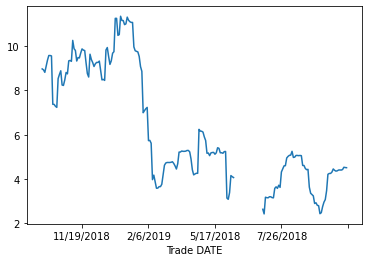

In [209]:
# Calculate rolling standard deviation

all_stocks_daily_absolute_return_rolling_std = all_stocks_daily_absolute_return.rolling(21).std()

# Plot rolling standard deviation

all_stocks_daily_absolute_return_rolling_std.plot()


### Calculate and plot the correlation

In [215]:
# Calculate and plot the correlation

corr_all_stocks_data = all_stocks_data.corr()
corr_all_stocks_data.head()

,AAPL,COST,GOOG
AAPL,1.000000,0.575554,0.544820
COST,0.575554,1.000000,0.523334
GOOG,0.544820,0.523334,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

AAPL     8.944369
COST    15.387500
GOOG    16.762129
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios for the Stocks'}>

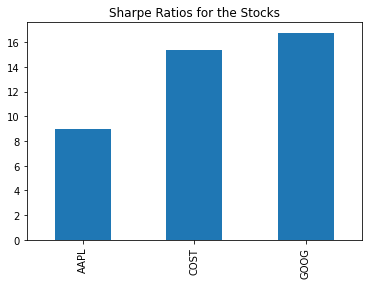

In [216]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratio_all_stocks_data = (all_stocks_data.mean()/ (all_stocks_data.std()))


print(sharpe_ratio_all_stocks_data)

sharpe_ratio_all_stocks_data.plot.bar(title='Sharpe Ratios for the Stocks')




In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

In [ ]:
# This calcuation is wrong but I am running out of time. so I am posting it anyway.  